In [2]:
local_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
exec(open(local_path + "connectivity/startup.py").read())

In [3]:
exec(open(local_path + "connectivity/analysis.py").read())

/Users/zhengz11/myscripts/git_clone/pn_kc/mushroom_2to3/build_connectivity.py:541: RuntimeWarning: invalid value encountered in double_scalars
  n = ci_matrix[col, row]*2 / np.sum(conn[(col,row),:])


In [4]:
from process_caron_data_v2 import *

ModuleNotFoundError: No module named 'process_caron_data_v2'

In [5]:
exec(open(local_path + "/connectivity/process_caron_data_v2.py").read())

In [12]:
num_exp = 1000

# make all gloms use this universal ids
# glom_id_table = pd.read_excel( "/Users/zhengz11/myscripts/data_results/171012-1D_olfactory_space/171012-glom_index_list.xlsx")
glom_id_table = pd.read_excel(
    local_path + "data/171012-glom_index_list.xlsx")

def get_zscores(conn, prob, num_exp=1000):
    stat = [get_raw_inputs(shuffle_glom_kc_w_prob(conn, prob)) for i in range(num_exp)]
    stat = np.array(stat)
    sd = np.nanstd(stat, axis=0)
    avg = np.nanmean(stat, axis=0)
    ob_ci = get_raw_inputs(conn)
    comm_zscore = np.divide(np.subtract(ob_ci, avg), sd)
    return comm_zscore

tbl_wc = tbl.copy()
ana_ca = CaronAnalysis.init_processing()
caron_obj = ana_ca.conn_data['caron_glom_kc']
ca_conn = caron_obj.conn['1s'].copy()
caron_obj.col_ids = df_lookup(
    'glom', ana_ca.glom_tbl['glom_class'], 'id', glom_id_table)

54
55
45
56
57
58


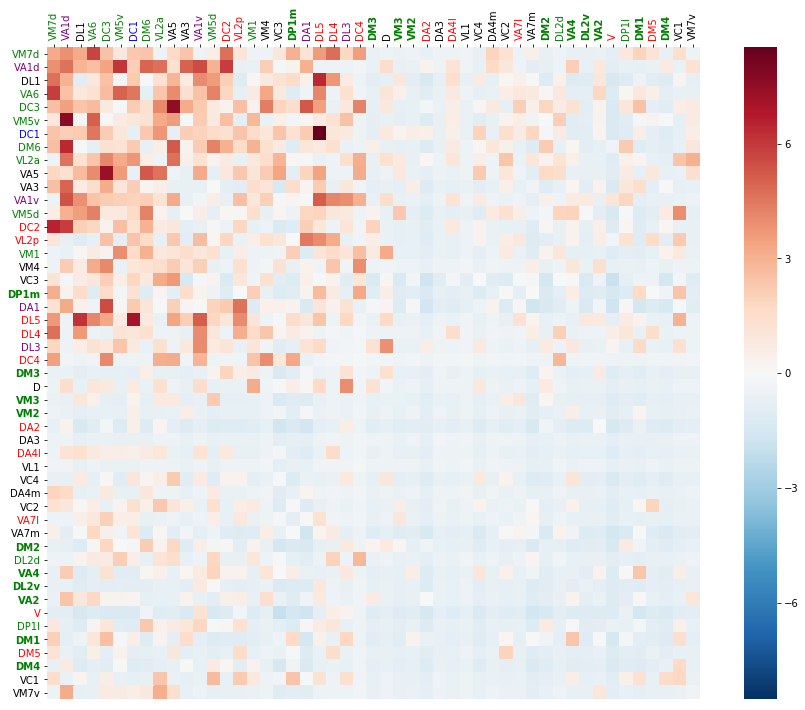

In [13]:
glom_list = glom_btn_table['glom_id'].tolist()
caron_prob = []
no_btn_list = []
for i in caron_obj.col_ids:
    if i not in glom_list:
        print(i)
        caron_prob.append(0)
        no_btn_list.append(i)
    else:
        j = df_lookup('glom_id', [i], 'norm_bouton_count', glom_btn_table)
        caron_prob.append(j[0])

# set the bouton probability of VC3 as the sum of VC3l and VC3m
vc3 = glom_btn_table.query(
    'short_glom_name=="VC3m" or short_glom_name=="VC3l"').norm_bouton_count.sum()

# must have a simpler way to do this?
# get VC3 id, get VC3 index from the id, then get
caron_prob[caron_obj.col_ids.index(
    glom_id_table.loc[glom_id_table.glom == 'VC3', 'id'].tolist()[0])] = vc3

# divide the remaining probability to the zero gloms
nnz = np.where(caron_prob)[0]
zeros = np.where(np.array(caron_prob)==0)[0]
ca_conn = np.concatenate([ca_conn[:,nnz],
                            np.sum(ca_conn[:,zeros],1).reshape(ca_conn.shape[0],1)],1)
caron_prob = [v for i,v in enumerate(caron_prob) if i in nnz]
caron_prob.append(1 - sum(caron_prob))
caron_col_ids = caron_obj.col_ids.copy()
caron_col_ids = [v for i,v in enumerate(caron_col_ids) if i in nnz]
caron_col_ids.append(100)

comm_zscore = get_zscores(ca_conn, caron_prob, num_exp=1000)

# ca_conn, caron_prob, caron_col_ids
# remove the final extra column

cm_zs = PairMatrix('', comm_zscore[:-1,:-1].copy(), caron_col_ids[:-1].copy())

reorder_idx = km_cluster(cm_zs.conn)
t1_zs = cm_zs.reorder(reorder_idx, return_new=True)

t1 = t1_zs
fig, ax1 = plt.subplots()
col_ids = t1.col_ids.copy()
t55 = col_ids.index(55)

gloms = df_lookup('id', t1.col_ids, 'glom', glom_id_table)
sns.heatmap(t1.conn, xticklabels=gloms, yticklabels=gloms, ax=ax1, vmin=-8.53, vmax=8.53, cmap="RdBu_r")

ax1.tick_params(bottom=False,labeltop=True, top=True, labelbottom=False)
ax1.tick_params(axis='x',labelrotation=90)

# run and get tbl in 191029-bouton-KC-representations_per_PN.py
col_list = t1.col_ids
col_colors = []
existing_gloms = pd.unique(tbl.short_glom_name)
for glom in gloms:
    if glom in existing_gloms:
        col_colors.append(df_lookup('short_glom_name', [glom], 'color', tbl)[0])
    else:
        col_colors.append('black')

for x in [ax1.get_xticklabels(), ax1.get_yticklabels()]:
    for idx, tick in enumerate(x):
        tick.set_color(col_colors[idx])
        if col_list[idx] in comm_ids:
            tick.set_weight("extra bold")

ax1.set_aspect("equal")
fig.set_size_inches(16,12)
plt.show()

In [11]:
import matplotlib.pyplot as plt

In [14]:
save_path = "/Users/zhengz11/myscripts/data_results/191202-redo_caron_comparison/"

glom_seq = pd.read_csv(save_path + '191204-Analyze_caron_conn_BtnNullModel_GlomSeq.csv').glom_seq_names.tolist()

In [1]:
import sys
import os
sys.path.append('/Users/zhengz11/myscripts/git_clone/pn_kc/')

import json
import mushroom_2to3.connect_path as cp
import mushroom_2to3.analysis_routine as ar


# credential, to delete when push to remote
sys.path.append('/Users/zhengz11/myscripts/mushroom_v9/credential/')
from fafb_tokens import token
fafb_c = cp.fafb_connection(token)

In [2]:
import pandas as pd
import numpy as np
from pymaid import rmaid
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import pymaid

# %run startup_py3.py
# %run load_pn_metadata_v1.py

# pn_skids = cc.get_skids_from_annos(fafb_c, [['right_calyx_PN'], ['has_bouton']], ["multiglomerular PN"])



NameError: name 'neurogenesis' is not defined

In [3]:
import mushroom_2to3.neurogenesis as neurogenesis

In [9]:
pns_ms = neurogenesis.init_from_skid_list(fafb_c, pn_skids)

downloading skeleton 2863104
downloading skeleton 57349
downloading skeleton 57353
downloading skeleton 11544074
downloading skeleton 16
downloading skeleton 23569
downloading skeleton 57361
downloading skeleton 43539
downloading skeleton 57365
downloading skeleton 11524119
downloading skeleton 192547
downloading skeleton 57381
downloading skeleton 36390
downloading skeleton 57385
downloading skeleton 23597
downloading skeleton 24622
downloading skeleton 37935
downloading skeleton 400943
downloading skeleton 775731
downloading skeleton 67637
downloading skeleton 11544121
downloading skeleton 57402
downloading skeleton 22594
downloading skeleton 57410
downloading skeleton 57414
downloading skeleton 30791
downloading skeleton 57418
downloading skeleton 57422
downloading skeleton 68697
downloading skeleton 1775706
downloading skeleton 23134
downloading skeleton 56424
downloading skeleton 41578
downloading skeleton 27246
downloading skeleton 33903
downloading skeleton 22132
downloading ske

In [16]:
import pickle
path = local_path + "data/pn_bouton_clusters/"

with open(path + "pns_ms.pkl", 'wb') as f:
    pickle.dump(pns_ms, f, -1)

In [18]:
with open(path + "pns_pm.pkl", 'wb') as f:
    pickle.dump(pns_pm, f, -1)

In [19]:
with open(path + "ca.pkl", 'wb') as f:
    pickle.dump(ca, f, -1)

In [12]:

import pymaid
rm = pymaid.CatmaidInstance('https://neuropil.janelia.org/tracing/fafb/v14/', 'zzheng',
'zzheng',
'9583bd368fbac3f65aaaf8a2d32ed179c8de9d9d')

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [13]:
nl = [pymaid.get_neuron([str(i) for i in j]) for j in [pn_skids[:40], pn_skids[40:80], pn_skids[80:]]]
pns_pm = nl[0] + nl[1] + nl [2]
ca = pymaid.get_volume('MB_CA_R')

In [14]:
ca

<class 'pymaid.core.Volume'> "MB_CA_R" at 0x1a4991f2e8: 325 vertices, 644 faces

In [10]:
df = pd.read_excel(local_path + 'data/180613-pn_subtypes.xlsx')

In [5]:
def save_json(js, file_name):
    with open(file_name, 'w+') as file:
        json.dump(js, file)
    file.close()

def load_json(path):
    with open(path) as outfile:
        r = json.load(outfile)
    return r

In [7]:


local_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
pn_skids = load_json(local_path + "data/skids/pn")

In [5]:
import sys
import os
sys.path.append('/Users/zhengz11/myscripts/git_clone/pn_kc/')

import json
import mushroom_2to3.connect_path as cp
import mushroom_2to3.analysis_routine as ar


# credential, to delete when push to remote
sys.path.append('/Users/zhengz11/myscripts/mushroom_v9/credential/')
from fafb_tokens import token
fafb_c = cp.fafb_connection(token)

In [8]:
# start a connection to fafb_c to download data
import sys
sys.path.append('/Users/zhengz11/myscripts/git_clone/pn_kc/')
import mushroom_2to3.connect_path as cp
import mushroom_2to3.analysis_routine as ar
import json

# import mushroom_2to3.connect as cc
local_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
def save_json(js, file_name):
    with open(file_name, 'w+') as file:
        json.dump(js, file)
    file.close()

def load_json(path):
    with open(path) as outfile:
        r = json.load(outfile)
    return r

pn_skids = load_json(local_path + "data/skids/pn")

In [5]:
import sys
sys.setrecursionlimit(30000)

In [20]:
import pickle
local_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
path = local_path + "data/pn_bouton_clusters/"
with open(path + "pns_pm.pkl", 'wb') as f:
    pickle.dump(pns_pm, f, -1)

In [ ]:
import pickle
local_path = "/Users/zhengz11/myscripts/git_clone/pn_kc/"
path = local_path + "data/pn_bouton_clusters/"
with open(path + "pns_pm.pkl", 'rb') as f:
    pns_pm = pickle.load(f)

In [9]:
nl = [pymaid.get_neuron([str(i) for i in j]) for j in [pn_skids[:40], pn_skids[40:80], pn_skids[80:]]]
pns_pm = nl[0] + nl[1] + nl [2]

In [10]:
pns_pm[0].skeleton_id

,
type,<class 'pymaid.core.CatmaidNeuron'>
neuron_name,PN glomerulus DA1 57316 ML 2863105
skeleton_id,2863104
n_nodes,6774
n_connectors,470
n_branch_nodes,280
n_end_nodes,292
n_open_ends,198
cable_length,1522.06
review_status,NA


In [21]:
import pickle
path = local_path + "data/pn_bouton_clusters/"
for i in pns_pm:
    with open(path + "pns_pm/" + "{}.pkl".format(i.skeleton_id), 'wb') as f:
        pickle.dump(i, f, -1)

In [22]:
import pickle
path = local_path + "data/pn_bouton_clusters/"
nl_t1 = []
for i in pn_skids:
    with open(path + "pns_pm/" + "{}.pkl".format(i), 'rb') as f:
        n = pickle.load(f)
        nl_t1.append(n)
        
pns_pm_l = pymaid.CatmaidNeuronList(nl_t1)

In [23]:
pns_pm_l

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57316 ML 2863105,2863104,6774,470,280,292,198,1522.055763,NA,True
1,PN glomerulus DA3 57350 HG,57349,7525,633,258,266,79,1487.804536,NA,True
2,PN glomerulus DA1 57354 GA,57353,6985,370,225,236,162,1539.354946,NA,True
3,PN glomerulus DL1 27304 JMR,11544074,9506,1069,408,434,224,1991.525656,NA,True
4,PN glomerulus VA6 017 DB,16,16840,2158,1172,1230,680,4003.150775,NA,True
...,...,...,...,...,...,...,...,...,...,...
108,PN glomerulus DA1 57324 LK JSL,57323,6223,481,256,268,167,1483.462634,NA,True
109,PN glomerulus VL2a 22000 JMR,21999,14781,2001,854,900,548,3531.057252,NA,True
110,PN glomerulus DL2d 57334 IJA,57333,5180,431,240,252,120,1337.451688,NA,True
111,PN glomerulus DL2d 57338 IJA,57337,5204,362,200,215,132,1234.089251,NA,True


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [14]:
pns_pm

,neuron_name,skeleton_id,n_nodes,n_connectors,n_branch_nodes,n_end_nodes,open_ends,cable_length,review_status,soma
0,PN glomerulus DA1 57316 ML 2863105,2863104,6774,470,280,292,198,1522.055763,NA,True
1,PN glomerulus DA3 57350 HG,57349,7525,633,258,266,79,1487.804536,NA,True
2,PN glomerulus DA1 57354 GA,57353,6985,370,225,236,162,1539.354946,NA,True
3,PN glomerulus DL1 27304 JMR,11544074,9506,1069,408,434,224,1991.525656,NA,True
4,PN glomerulus VA6 017 DB,16,16840,2158,1172,1230,680,4003.150775,NA,True
...,...,...,...,...,...,...,...,...,...,...
108,PN glomerulus DA1 57324 LK JSL,57323,6223,481,256,268,167,1483.462634,NA,True
109,PN glomerulus VL2a 22000 JMR,21999,14781,2001,854,900,548,3531.057252,NA,True
110,PN glomerulus DL2d 57334 IJA,57333,5180,431,240,252,120,1337.451688,NA,True
111,PN glomerulus DL2d 57338 IJA,57337,5204,362,200,215,132,1234.089251,NA,True


In [5]:
pns_pm

NameError: name 'pns_pm' is not defined

In [5]:
import numpy as np
np.linspace(0, 3.5, 8)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])